In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as catcols
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cp '/content/drive/MyDrive/Colab Notebooks/kidney_disease_prediction/training/kidney_disease.csv' '/content/'

data = pd.read_csv('kidney_disease.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']

data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [ ]:
#data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
#data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
#data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
#data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
#data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
#data['potassium'].fillna(data['potassium'].mean(),inplace=True)
#data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
#data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
#data['sodium'].fillna(data['sodium'].mean(),inplace=True)
#data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [ ]:
#data['age'].fillna(data['age'].mode()[0],inplace=True)
#data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
#data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
#data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
#data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
#data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
#data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
#data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
#data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
#data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
#data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
#data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
#data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
#data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)


In [ ]:
#catcols=set(data.dtypes[data.dtypes=='0'].index.value)
#print(catcols)

In [ ]:
#for i in catcols:
   #print("Columns:",i)
   #print(c(data[i])) 
   #print('*'*120+'\n')

In [ ]:
#catcols.remove('red_blood_cell_count')
#catcols.remove('packed_cell_volume')
#catcols.remove('white_blood_cell_count')
#print(catcols)

In [ ]:
#'specific_gravity','albumin','sugar'(as these columns are numeric it is removed)
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
         'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [ ]:
from sklearn.preprocessing import LabelEncoder 
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi=LabelEncoder()
    print(c(data[i]))
    data[i]=LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
Counter({0: 339, 1: 60, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
Counter({0: 323, 1: 76, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 317, 'poor': 82, nan: 1})
Counter({0: 317, 1: 82, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 374, 'present': 22, nan: 4})
Counter({0: 374, 1: 22, 2: 4})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
******************************************************************************

In [ ]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
#contcols=pd.DataFrame(data,columns=contcols)
print(contcols)


{'id', 'hypertension', 'pedal_edema', 'specific_gravity', 'red_blood_cells', 'blood_urea', 'white_blood_cell_count', 'diabetesmellitus', 'sugar', 'hemoglobin', 'anemia', 'pus_cell', 'packed_cell_volume', 'age', 'blood glucose random', 'pus_cell_clumps', 'red_blood_cell_count', 'albumin', 'sodium', 'potassium', 'serum_creatinine', 'blood_pressure', 'bacteria', 'appetite', 'coronary_artery_disease', 'class'}


In [ ]:
for i in contcols:
    print("Continous Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns: id
Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1,

In [ ]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'id', 'hypertension', 'pedal_edema', 'red_blood_cells', 'blood_urea', 'white_blood_cell_count', 'diabetesmellitus', 'hemoglobin', 'anemia', 'pus_cell', 'packed_cell_volume', 'age', 'blood glucose random', 'pus_cell_clumps', 'red_blood_cell_count', 'sodium', 'potassium', 'serum_creatinine', 'blood_pressure', 'bacteria', 'appetite', 'coronary_artery_disease', 'class'}


In [ ]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)


{'id', 'hypertension', 'pedal_edema', 'red_blood_cells', 'blood_urea', 'white_blood_cell_count', 'diabetesmellitus', 'hemoglobin', 'anemia', 'pus_cell', 'packed_cell_volume', 'age', 'blood glucose random', 'pus_cell_clumps', 'red_blood_cell_count', 'sodium', 'potassium', 'serum_creatinine', 'blood_pressure', 'bacteria', 'appetite', 'coronary_artery_disease', 'class'}


In [ ]:
#catcols.add('specific_gravity')
#catcols.add('albumin')
#catcols.add('sugar')
#print(catcols)

In [ ]:
#data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
#c(data['coronary_artery_disease'])


In [ ]:
#data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
#c(data['diabetesmellitus'])

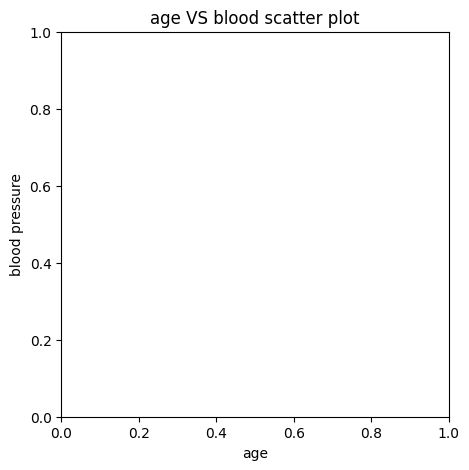

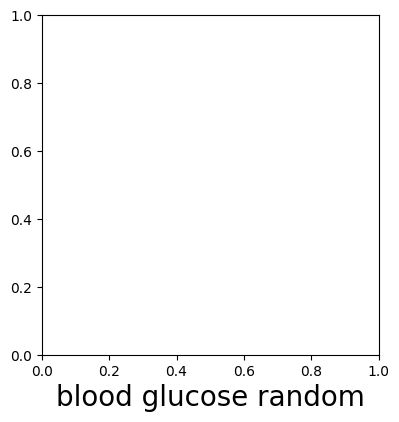

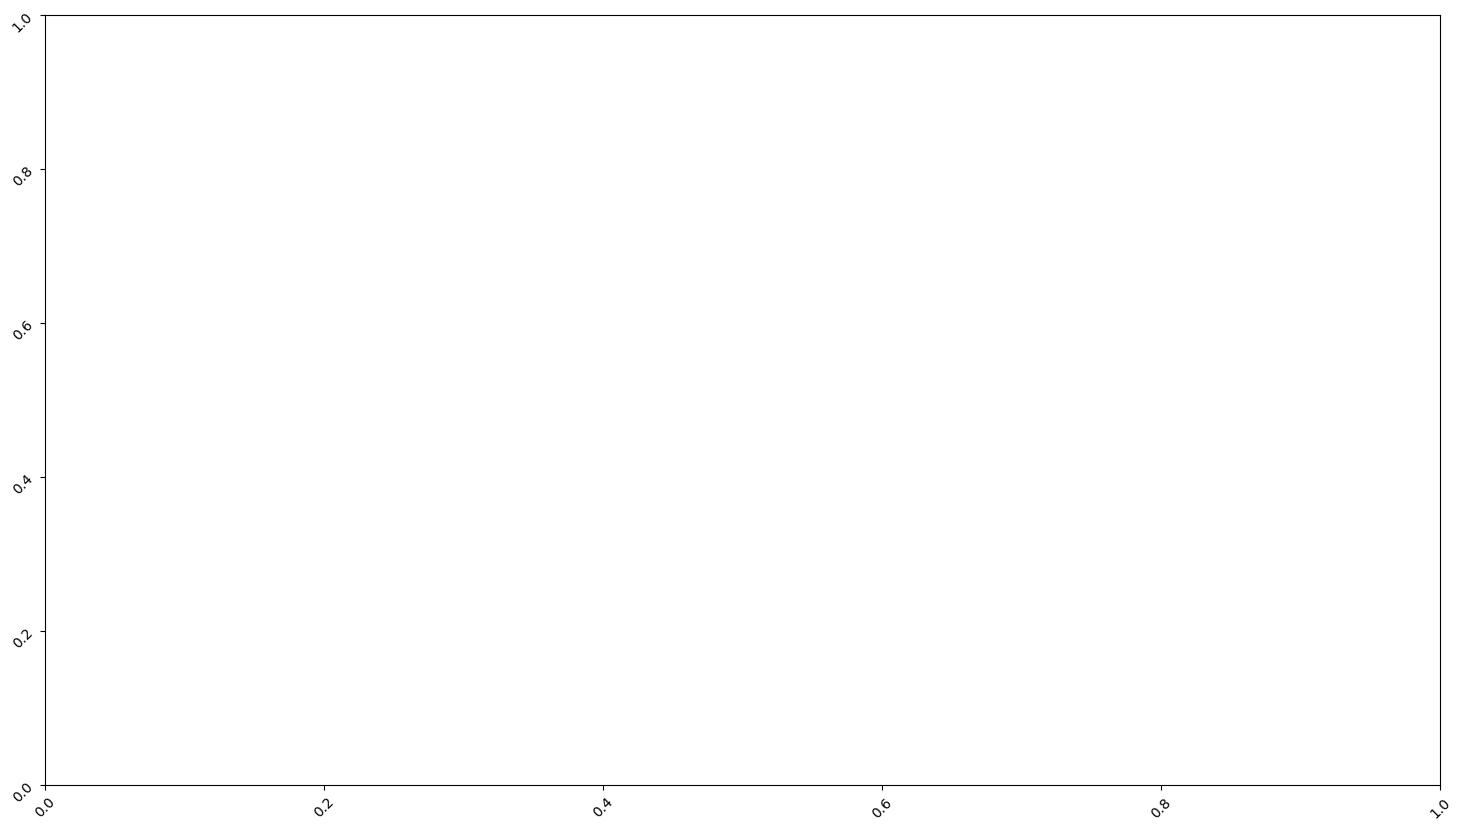

In [ ]:
#data.describe()
import seaborn as sns
#sns.distplot(data.age)
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(5,5))
#plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age') 
plt.ylabel('blood pressure')
plt.title("age VS blood scatter plot")

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
contcols=['potassium','hemoglobin','age','sodium',
          'packed_cell_volume','serum_creatinine','red_blood_cell_count','blood_pressure',
          'blood_urea','white_blood_cell_count','blood glucose random']
for column in contcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)#3,4 is refer to 3x4 matrix
    #plt.scatter(data['age'],data[column],color=blue)
    plt.xlabel(column,fontsize=20)
 #plotnumber+=1
plt.show()

#HEAT MAP #correlation of parameters
f,ax=plt.subplots(figsize=(18,10))
#sns.(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

#sns.countplot(data['class'])

#performing feature Scaling operation using standard scaller on X part of the dataset because
#there different type of values in the columns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#x_bal=sc.fit_transform(x)

setcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea',
         'pedal_edema','anemia','diabetesmillitus','coronary_artery_disease']
#x=pd.DataFrame(data,columns=selcols)
#y=pd.DataFrame(data,columns=['class'])
#print(x.shape)
#print(y.shape)

from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
import tensorflow
#from tensorflow.keras.model import Sequential
#from tensorflow.keras.model import Dence

In [ ]:
#classification= Sequential()
#classification.add(Dense(30,activation='relu'))
#classification.add(Dense(128,activation='relu'))
#classification.add(Dense(64,activation='relu'))
#classification.add(Dense(32,activation='relu'))
#classification.add(Dense(1,activation='sigmoid'))

In [ ]:
#Compiling the ANN model
#classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
#classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
#rfc.fit(x_train,y_train)

In [ ]:
#y_predict=rfc.predict(x_test)
#y_predict=rfc.predict(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [ ]:
#dtc.fit(x_train,y_train)

In [ ]:
#y_predict=dtc.predict(x_test)
#y_predict

In [ ]:
#y_predict_train=dtc.predict(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
#lgr.fit(x_train,y_train)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
#y_predict=lgr.predict(x_test)


In [ ]:
#logistic Regression
#y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
#print(y_pred)
#(y_pred)

In [ ]:
#DecisionTree Classsifier
#y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
#print(y_pred)
#(y_pred)


In [ ]:
#Random Forest Classifier
#y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
#print(y_pred)
#(y_pred)

In [ ]:
#classification.save("ckd.h5")

In [ ]:
#Testing the model
#y_pred=classification.predict(x_test)

In [ ]:
#y_pred


In [ ]:
#y_pred=(y_pred>0.5)
#y_pred

In [ ]:
def predict_exit(sample_value):
  # Convert list to numpy array
  sample_value=np.array(sample_value)
  #Reshape because sample_value contains only 1 record
  sample_value=sample_value.reshape(1,-1)
  #Feature Scaling
  sample_value=sc.transform(sample_value)
  #return classifier.predict(sample_value)

In [ ]:
#test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
#if test==1:
  #print('predicttion:High change of CKD!')
#else:
  #print('prediction:Low chance of CKD.')

LogReg
RF
DecisionTree


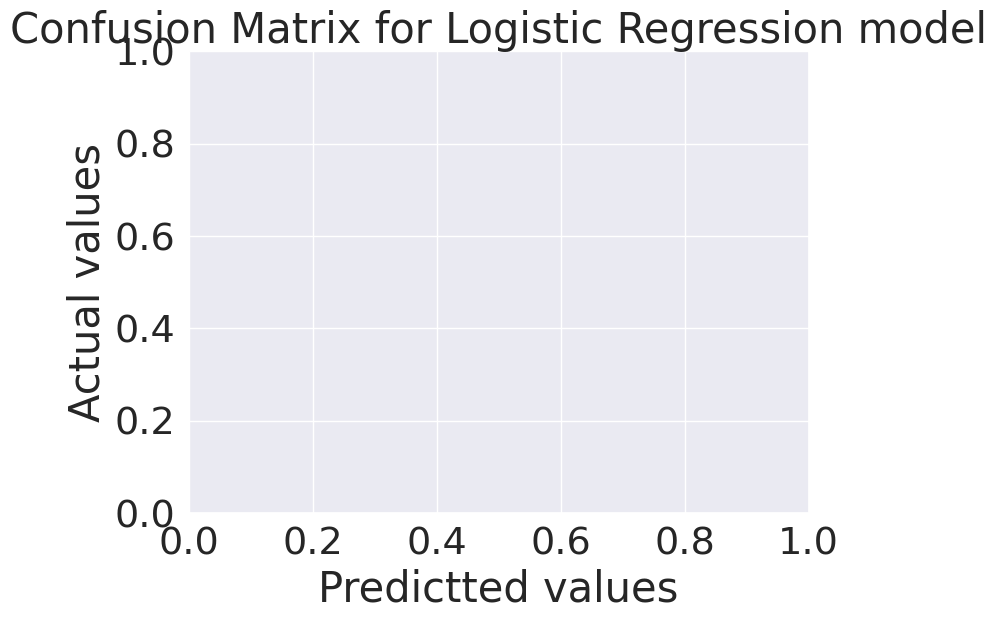

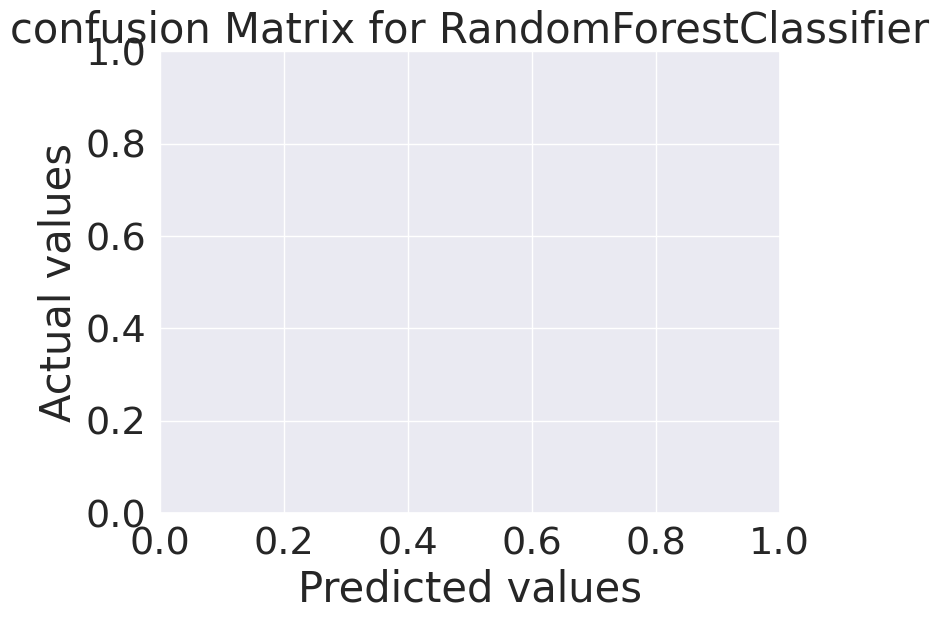

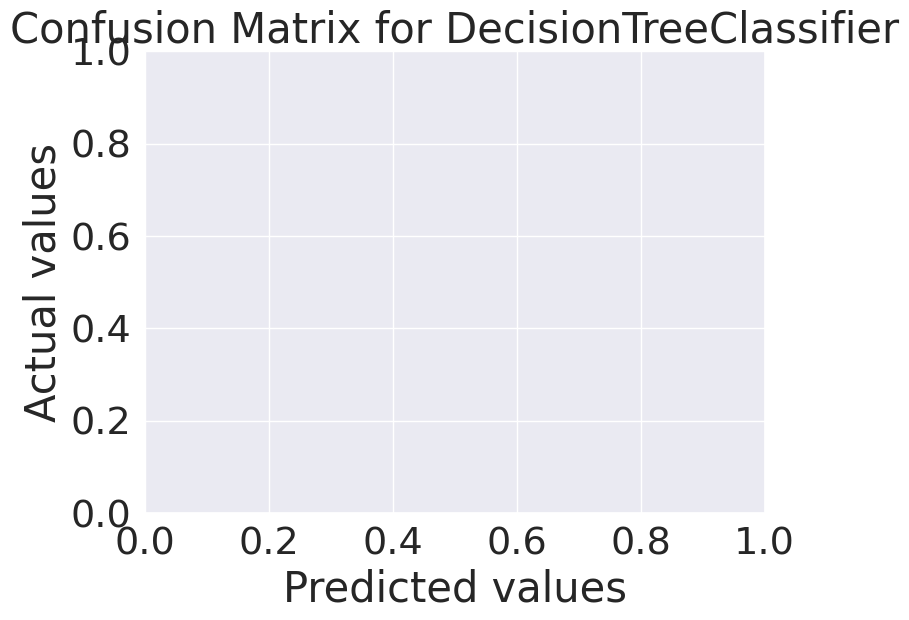

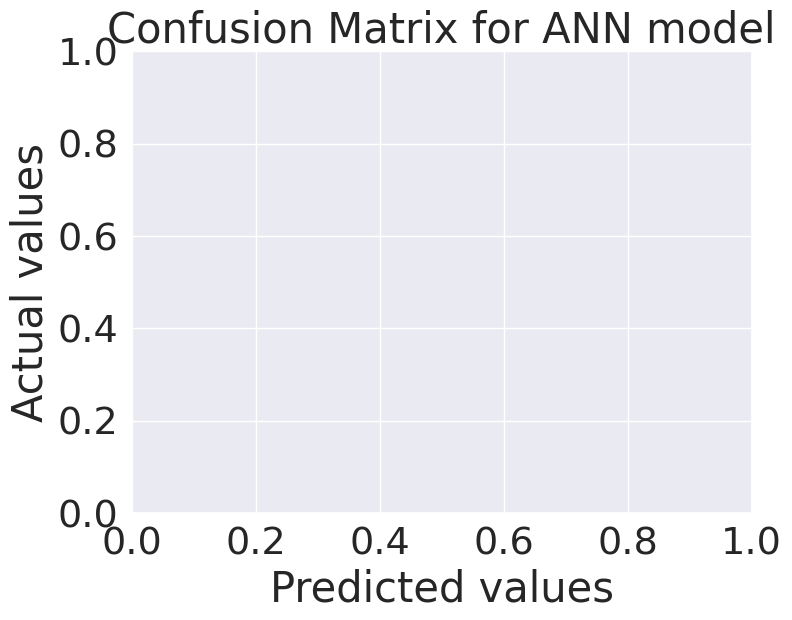

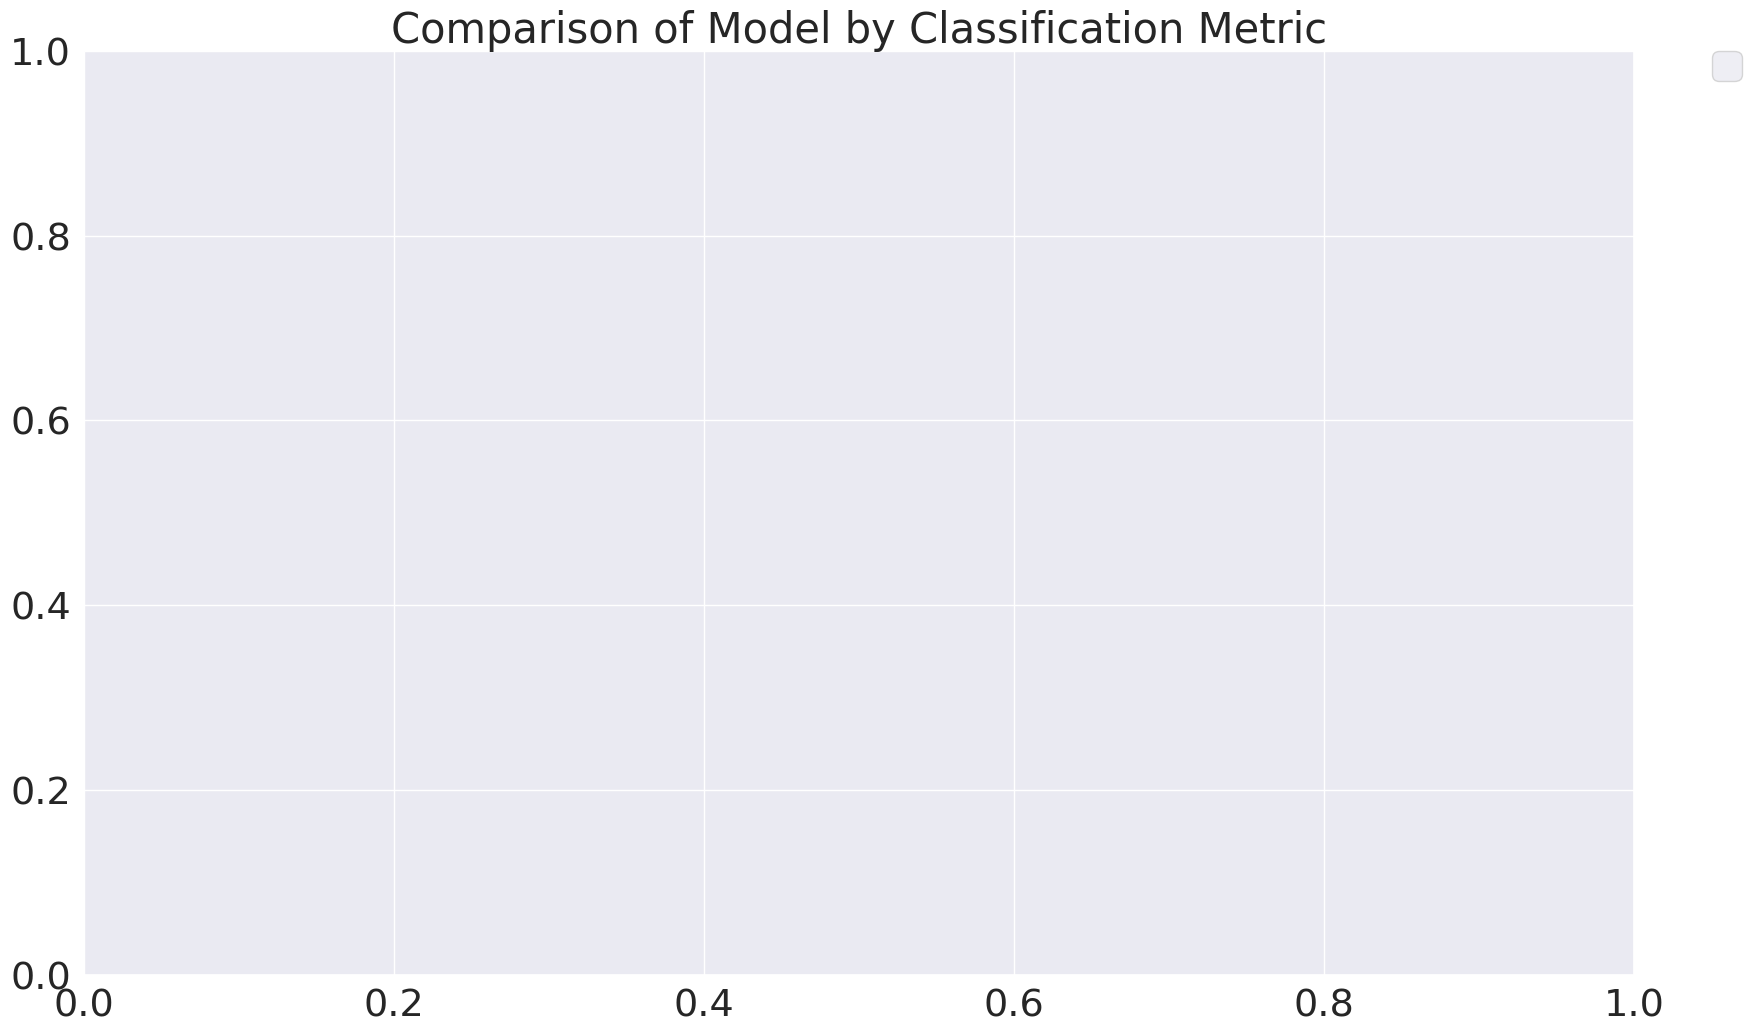

In [ ]:
from sklearn import model_selection

dfs=[]
models=[
        ('LogReg', LogisticRegression()),
        ('RF', RandomForestClassifier()),
        ('DecisionTree',DecisionTreeClassifier())
       ]
results=[]
names=[]
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names=['NO CKD','CKD']
for name,model in models:
  kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=90210)
  #cv_results=model_selection.cross_validation(model,x_train,y_train,cv=kfold,scoring=scoring)
  #clf=model.fit(x_train,y_train)
  #y_pred=clf.predict(x_test)
  print(name)
  #print(classification_report(y_test,y_pred,target_names=target_names))
  #results.append(cv_results)
  names.append(name)
  #this_df=pd.DataFrame(cv_results)
  #this_df['model']=name
  #dfs.append(this_df)
  #final=pd.concat(dfs,ignore_index=True)
  #return final

#Making the Confusion Matix
from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_predict)
#cm

#Plotting confusion matrix
plt.figure(figsize=(8,6))
#sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predictted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_predict)
#cm

#plotting confusion matrix
plt.figure(figsize=(8,6))
#sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion Matrix for RandomForestClassifier')
plt.show()

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_predict)
#cm

#plotting confusion matrix
plt.figure(figsize=(8,6))
#sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

#print(classification_report(y_test,y_pred))

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_pred)
#cm

#Plotting confusion matrix
plt.figure(figsize=(8,6))
#sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

bootstraps=[]
#for model in list(set(final.model.values)):
  #model_df=final.loc[final.model==model]
  #bootstrap=model_df.sample(n=30,replace=True)
  #bootstrap.append(bootstrap)

#bootstrap_df=pd.concat(bootstrap,ignore_index=True)
#results_long=pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_names='values')
time_metrics=['fit_time','score_time']
##PERFORMANCE METRICS
#results_long_nofit=results_long.loc[results_long['metrics'].isin(time_metrics)]
#results_long_nofit=results_long_nofit.sort_values(by='values')
##TIME METRICS
#results_long_nofit=results_long.loc[results_long['metrics'].isin(time_metrics)]
#results_long_nofit=results_long_nofit.sort_values(by='values')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
#g=sns.boxplot(x="model",y="metrics",data=results_long_nofit,palette="set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)
#pickle.dump(lgr,open('CkD.pk1','wb'))

